[![alt text](https://avatars2.githubusercontent.com/u/60108327?s=400&u=4aaa7e2f7be4d0105bbcc0994e973c469b724237&v=4)](https://github.com/mc-Vvp/Project)

<br>

<br>

# Import pandas, numpy and matplolib

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

<br>

# Showing the data and explain the features

In [5]:
df = pd.read_csv('bs140513_032310.csv')
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


* **step:** This feature represents the day from the start of simulation. It has 180 steps so simulation ran for virtually 6 months.
* **Customer:** This feature represents the customer id
* **zipCodeOrigin:** The zip code of origin/source.
* **Merchant:** The merchant's id
* **zipMerchant:** The merchant's zip code
* **Age:** Categorized age <br>
   * 0: <= 18, <br>
   * 1: 19-25, <br>
   * 2: 26-35, <br>
   * 3: 36-45, <br>
   * 4: 46:55, <br>
   * 5: 56:65, <br>
   * 6: > 65 <br>
   * U: Unknown

* **Gender:** Gender for customer
   * E : Enterprise, <br>
   * F: Female, <br>
   * M: Male, <br>
   * U: Unknown
* **Category:** Category of the purchase. I won't write all categories here, we'll see them later in the analysis.
* **Amount:** Amount of the purchase
* **Fraud:** Target variable which shows if the transaction fraudulent(1) or benign(0)

<br>

# Checking the data and understand it

#### check if there are any null values in the data

In [3]:
df.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

#### check how many customeres are in the dataset

In [4]:
len(df['customer'].unique())

4112

#### check the amount of every value in the category feature

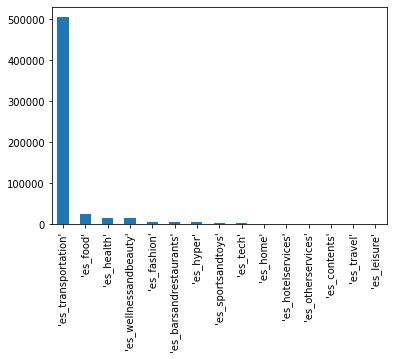

In [5]:
df['category'].value_counts().plot.bar()
plt.show()

#### check the amount of fraud in every category

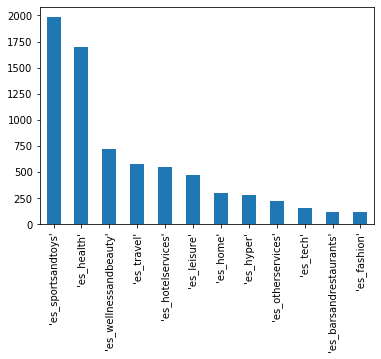

In [6]:
df[df['fraud'] == 1]['category'].value_counts().plot.bar()
plt.show()

#### show the percentage between the fraud and all the purchases

In [7]:
print("there are {} frauds out of {} purchases".format(len(df[df['fraud'] == 1]),len(df['fraud'])))
print("its around {}% ".format("%.2f" % ((len(df[df['fraud'] == 1])/len(df['fraud']))*100)))

there are 7200 frauds out of 594643 purchases
its around 1.21% 


#### show the dependency between the genders and the fraods amount

In [8]:
for i in df['gender'].unique():
    print("For gender {}:\n{}".format(i, df[df['gender']==i]['fraud'].value_counts()))

For gender 'M':
0    265950
1      2435
Name: fraud, dtype: int64
For gender 'F':
0    319807
1      4758
Name: fraud, dtype: int64
For gender 'E':
0    1171
1       7
Name: fraud, dtype: int64
For gender 'U':
0    515
Name: fraud, dtype: int64


#### check how many genders are in the dataset

In [11]:
df['age'].unique()

array(["'4'", "'2'", "'3'", "'5'", "'1'", "'6'", "'U'", "'0'"],
      dtype=object)

#### show the dependency between the ages and the fraods amount

In [12]:
for i in df['age'].unique():
    print("For age {}:\n{}".format(i, df[df['age']==i]['fraud'].value_counts()))

For age '4':
0    107615
1      1410
Name: fraud, dtype: int64
For age '2':
0    184966
1      2344
Name: fraud, dtype: int64
For age '3':
0    145376
1      1755
Name: fraud, dtype: int64
For age '5':
0    61956
1      686
Name: fraud, dtype: int64
For age '1':
0    57442
1      689
Name: fraud, dtype: int64
For age '6':
0    26513
1      261
Name: fraud, dtype: int64
For age 'U':
0    1171
1       7
Name: fraud, dtype: int64
For age '0':
0    2404
1      48
Name: fraud, dtype: int64


#### Visualizating the previos foundings with barplot

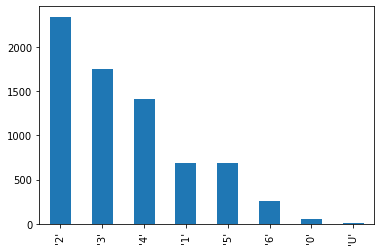

In [13]:
df[df['fraud'] == 1]['age'].value_counts().plot.bar()
plt.show()

#### checking if the 'zipcodeOri' and the 'zipMerchant' features have only one value

In [15]:
print(df['zipcodeOri'].unique())
print(df['zipMerchant'].unique())

["'28007'"]
["'28007'"]


<br>

<br>

# Start the data preparation for the model learn

#### creating copy of the original dataframe

In [7]:
df1 = df.copy()

#### deleting the 'zipMerchant' and the 'zipcodeOri' features

In [8]:
df1 = df1.drop(['zipMerchant', 'zipcodeOri'], axis=1)

#### showing the newdata frame without the Irrelevant features

In [9]:
df1.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0


#### cast every string value to integer

In [10]:
col_categorical = df1.select_dtypes(include= ['object']).columns
for col in col_categorical:
    df1[col] = df1[col].astype('category')
# categorical values ==> numeric values
df1[col_categorical] = df1[col_categorical].apply(lambda x: x.cat.codes)
df1.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


#### devide each value by the max value in the feature

In [11]:
for x in df1:
    df1[x] = df1[x]/df1[x].max()
df1.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0.0,0.051082,0.571429,0.666667,0.612245,0.857143,0.000546,0.0
1,0.0,0.669667,0.285714,0.666667,0.612245,0.857143,0.004764,0.0
2,0.0,0.555826,0.571429,0.333333,0.367347,0.857143,0.003228,0.0
3,0.0,0.401362,0.428571,0.666667,0.612245,0.857143,0.002071,0.0
4,0.0,0.872051,0.714286,0.666667,0.612245,0.857143,0.004288,0.0


<BR>

<BR>

# Model learning

#### import sklearn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

#### drop the 'fraud' feature in order to predict it

In [12]:
X=df1.drop('fraud', axis=1)
y=df1['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<BR>

## Logidtic regression

In [13]:
lr=LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    176229
         1.0       0.96      0.27      0.43      2164

    accuracy                           0.99    178393
   macro avg       0.98      0.64      0.71    178393
weighted avg       0.99      0.99      0.99    178393

[[176205     24]
 [  1571    593]]
0.991059066218966


## KNN

In [29]:
#knn - predictions are made 
k=KNeighborsClassifier(n_neighbors=1)
k.fit(X_train,y_train)
#now we have train the model

predictions=k.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    176229
         1.0       0.66      0.56      0.61      2164

    accuracy                           0.99    178393
   macro avg       0.83      0.78      0.80    178393
weighted avg       0.99      0.99      0.99    178393

[[175588    641]
 [   945   1219]]
0.9911095166290157


In [30]:
#knn - predictions are made 
k=KNeighborsClassifier(n_neighbors=3)
k.fit(X_train,y_train)
#now we have train the model

predictions=k.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    176229
         1.0       0.74      0.52      0.61      2164

    accuracy                           0.99    178393
   macro avg       0.87      0.76      0.80    178393
weighted avg       0.99      0.99      0.99    178393

[[175831    398]
 [  1041   1123]]
0.9919335399931611


In [31]:
#knn - predictions are made 
k=KNeighborsClassifier(n_neighbors=5)
k.fit(X_train,y_train)
#now we have train the model

predictions=k.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    176229
         1.0       0.77      0.48      0.59      2164

    accuracy                           0.99    178393
   macro avg       0.88      0.74      0.79    178393
weighted avg       0.99      0.99      0.99    178393

[[175919    310]
 [  1126   1038]]
0.9919503567965111


In [32]:
#knn - predictions are made 
k=KNeighborsClassifier(n_neighbors=7)
k.fit(X_train,y_train)
#now we have train the model

predictions=k.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    176229
         1.0       0.78      0.46      0.58      2164

    accuracy                           0.99    178393
   macro avg       0.89      0.73      0.79    178393
weighted avg       0.99      0.99      0.99    178393

[[175954    275]
 [  1169    995]]
0.991905511987578


In [33]:
#knn - predictions are made 
k=KNeighborsClassifier(n_neighbors=10)
k.fit(X_train,y_train)
#now we have train the model

predictions=k.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    176229
         1.0       0.84      0.39      0.53      2164

    accuracy                           0.99    178393
   macro avg       0.91      0.70      0.76    178393
weighted avg       0.99      0.99      0.99    178393

[[176064    165]
 [  1317    847]]
0.9916924991451458


## Random forest

In [34]:
# X, y = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
predictions=clf.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[7.79037278e-04 2.15799579e-03 2.99046385e-05 1.06671411e-03
 2.62746434e-01 1.32589025e-01 6.00630889e-01]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    176229
         1.0       0.90      0.30      0.45      2164

    accuracy                           0.99    178393
   macro avg       0.94      0.65      0.72    178393
weighted avg       0.99      0.99      0.99    178393

[[176155     74]
 [  1515    649]]
0.9910926998256658


In [35]:
# X, y = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
predictions=clf.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.01689011 0.01933772 0.00548848 0.00235224 0.20342234 0.10157731
 0.6509318 ]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    176229
         1.0       0.91      0.69      0.78      2164

    accuracy                           1.00    178393
   macro avg       0.95      0.84      0.89    178393
weighted avg       1.00      1.00      1.00    178393

[[176078    151]
 [   677   1487]]
0.9953585622754256


In [36]:
# X, y = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
predictions=clf.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.06702871 0.07650467 0.02332766 0.00395746 0.18098491 0.09609812
 0.55209847]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    176229
         1.0       0.89      0.72      0.80      2164

    accuracy                           1.00    178393
   macro avg       0.95      0.86      0.90    178393
weighted avg       1.00      1.00      1.00    178393

[[176046    183]
 [   614   1550]]
0.9955323359100413


In [37]:
# X, y = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=100, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
predictions=clf.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.07378995 0.08124355 0.02256076 0.00395716 0.20461805 0.07640787
 0.53742266]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    176229
         1.0       0.90      0.71      0.79      2164

    accuracy                           1.00    178393
   macro avg       0.95      0.85      0.90    178393
weighted avg       1.00      1.00      1.00    178393

[[176063    166]
 [   627   1537]]
0.9955547583145079
